## DECISION TREE IN MACHINE LEARNING

### What is decision tree?
        First we need to understand that what does decision tree means. It means that it is a kind of supportive tool which helps us to understand the possible consequences through tree-like model. 

### Why decision tree needed?
        As it gives tree-like model it descibes every possible solution in algorithm which can easily understandable. It provides very effective and deep knowledge about the situation. That's how decision tree helps in ML.

- In our case I used the diabetes database which contains information about Pregnancies, Glucose level, BloodPressure, Skin Thickness, Insulin, BMI, Age, DiabetesPedigreeFunction for more than 700 patients and its outcome.

- First we need to understand that why decision tree will need for this dataset, As we have discussed that it has its output with some kind of category. So by generating the decision tree we can easily undestand that how it is categorised.

- So, let's dig into it.

### 1) Import libraries

- Here, we needed few libraries to perform decision tree classifier.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from io import StringIO
from sklearn.metrics import accuracy_score
from io import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus



### 2) Import Dataset

- Import dataset using pandas.

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 3) Split dataset

- After importing the dataset we need to split it into train and test so that we can calculate accuracy of the model. Here we have split the dataset with 85% of train set and rest of it for testing.

In [5]:

X = df[['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15)

- Here, we have saved the column names in one variable so we can use it in decision tree diagram later on. We need to specify it because we haven't used all the column of dataset.

In [6]:
f_name = ['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']

### 4) Train the model

- First classify the model and than fit the data into it. Notice that here we have used the 'ENTROPY' criterion for decision tree classifier.

In [7]:
dtc = DecisionTreeClassifier(max_depth=4, criterion='entropy')
dtc = dtc.fit(X_train, y_train)

### 5) Prediction

- Now, let's predict the value.

In [8]:
y_hat = dtc.predict(X_test)
y_hat

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1], dtype=int64)

In [9]:
np.array(y_test)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0], dtype=int64)

- Here, we have got 72% accuracy score.

In [10]:
accuracy_score(y_hat,y_test)

0.7241379310344828

### 5) Display the Decision Tree

- We can display the decision tree using graphviz function.

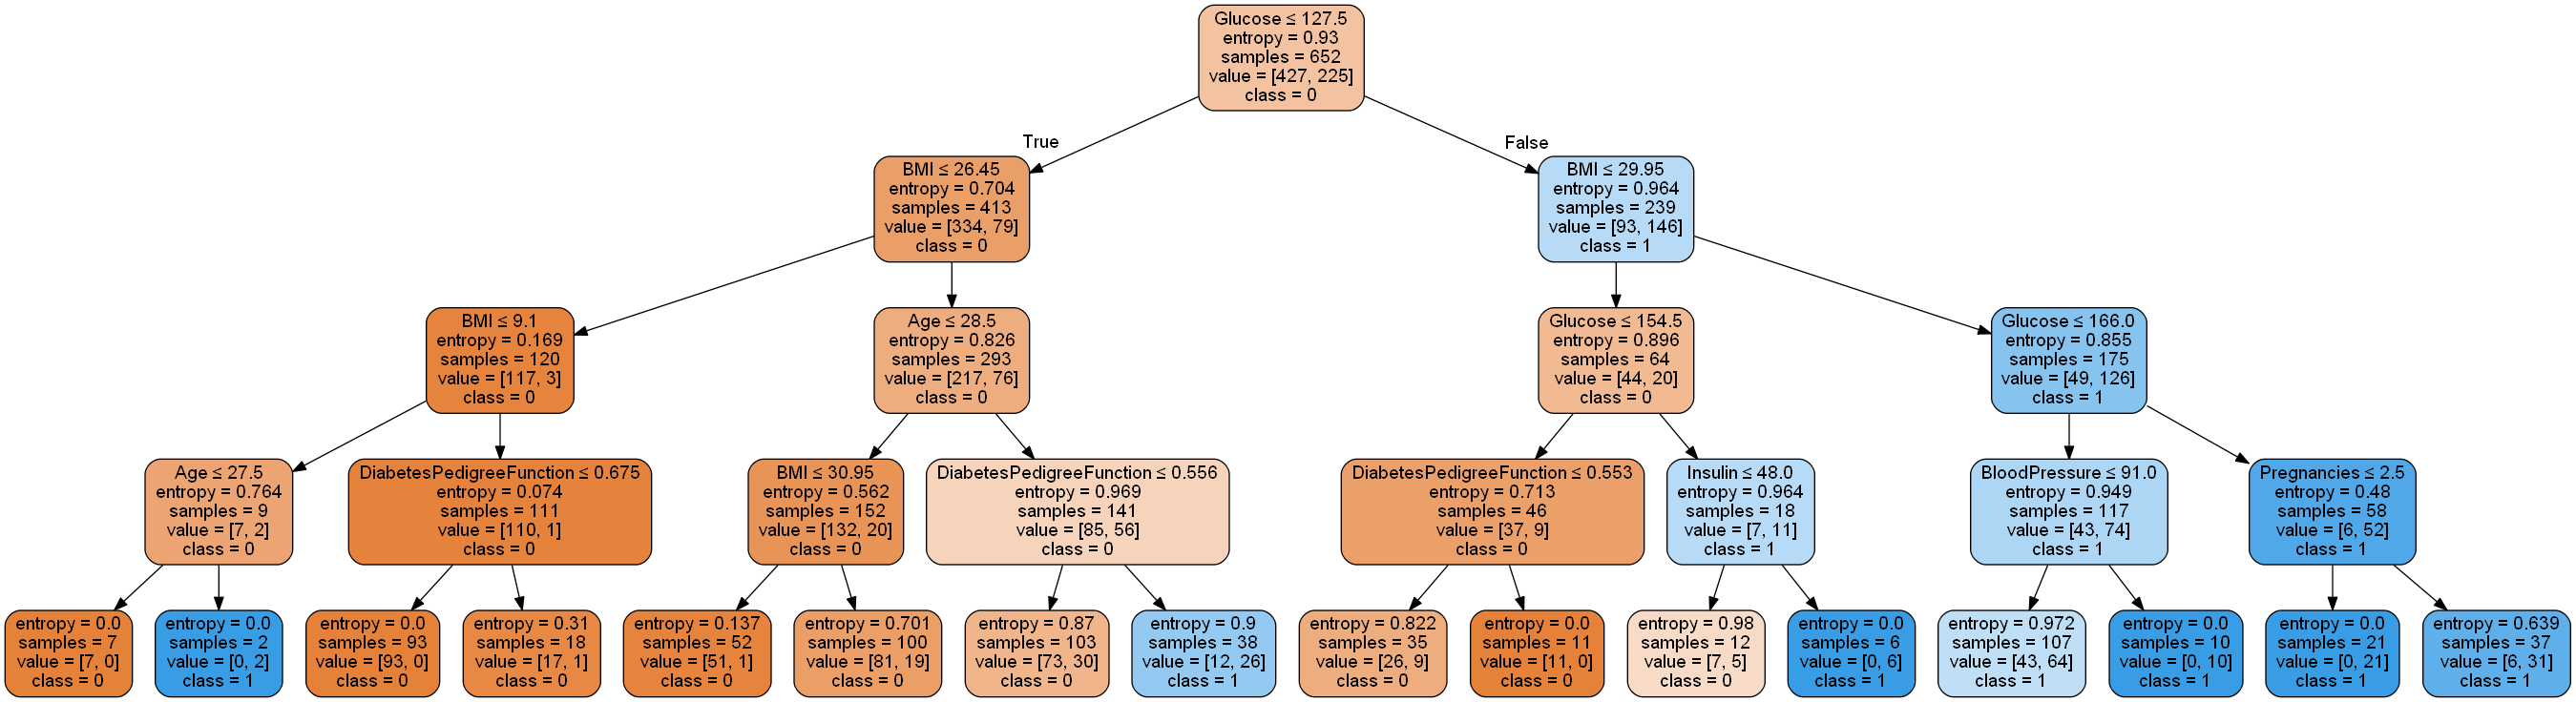

In [11]:


dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = f_name,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())